In [1]:
import os,sys
from pmtool.ToolBox import ToolBox
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [2]:
parameters = {'data_path': r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Duke-Breast-Cancer-MRI', # path to your DICOM data
              'data_type': 'dcm', # original data format: DICOM
              'multi_rts_per_pat': False,
              'image_only' : True}   # when False, it will look only for 1 rtstruct in the patient folder, 
                                            # this will speed up the process, 
                                            # if you have more then 1 rtstruct per patient, set it to True


In [ ]:
data_dcms = ToolBox(**parameters)

In [12]:
MRI_dcms = ToolBox(**parameters)
dataset_description = MRI_dcms.get_dataset_description('MRI') 
dataset_description.head(10)

100%|█████████▉| 922/923 [04:29<00:00,  2.24it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\DataSet.py:98: UserWarning: No dcm data found for patient:LICENSE check the folder, ensure that dicom files ends with .dcm
  warn('No dcm data found for patient:%s check the folder, ensure that dicom files ends with .dcm'%patient)
Patients processed: 100%|██████████| 922/922 [1:07:37<00:00,  4.40s/it]


,Manufacturer,SliceThickness,PixelSpacing,StudyDate,MagneticFieldStrength,EchoTime,patient,slice#
0,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,0
1,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,1
2,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,2
3,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,3
4,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,4
5,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,5
6,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,6
7,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,7
8,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,8
9,SIEMENS,1.1,"[0.80357140302658, 0.80357140302658]",19900101,1.5,1.36,Breast_MRI_001,9


In [11]:
print('Unique modalities found: ', np.unique(dataset_description.Modality.values)[0])

Unique modalities found:  MR


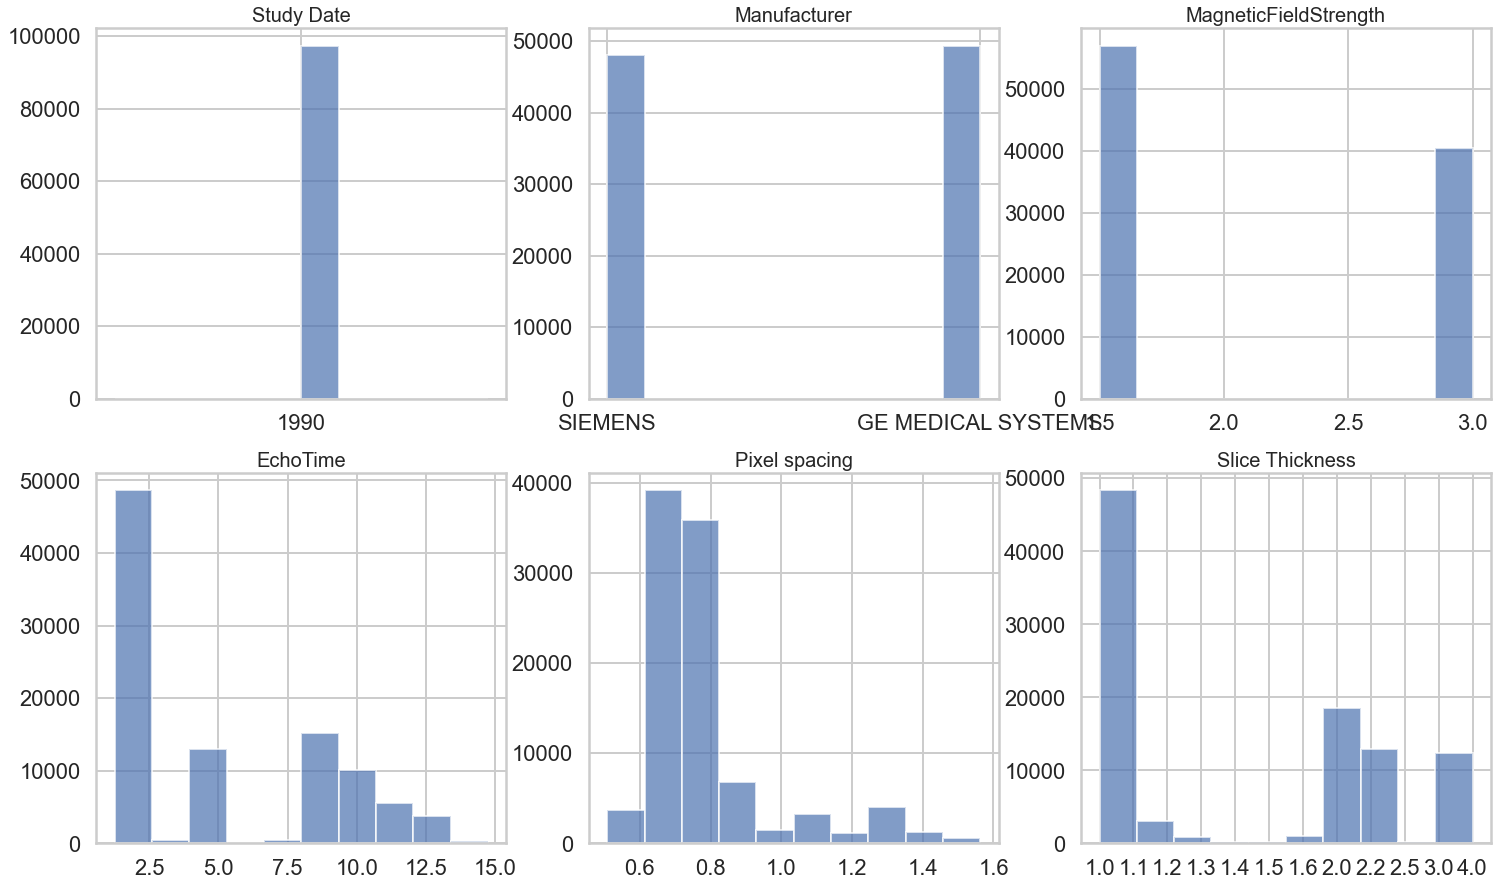

In [13]:
sb.set(context='poster', style='whitegrid')
#changed some of these to fit this dataset
study_date = sorted([ 'Nan' if x=='' or x=='NaN' else str(x[0:4]) for x in list(dataset_description['StudyDate'])])[2:]
manu =['Nan' if x=='' or x=='NaN' else x for x in list(dataset_description['Manufacturer'])]
magfield_strength =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['MagneticFieldStrength'])]
echot =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['EchoTime'])]
ps = sorted([(x[0]) for x in list(filter(lambda x: x != 'NaN', dataset_description['PixelSpacing'].values))])
sl_th = sorted([str(x)[0:3] for x in list(filter(lambda x: x != 'NaN', dataset_description['SliceThickness'].values))])
figures,descriptions = [study_date,manu,magfield_strength,echot,ps,sl_th],['Study Date','Manufacturer','MagneticFieldStrength','EchoTime','Pixel spacing','Slice Thickness']

fig,ax = plt.subplots(2,3,figsize=(25,15))
for i in range(2):
    for j in range(3):
        ax[i,j].hist(figures.pop(0),alpha=0.7)
        ax[i,j].set_title(descriptions.pop(0),fontsize=20)

In [14]:
qc_params = {'specific_modality': 'MR', # target modality: CT
            'thickness_range': [1,2], # slice thickness should be in range of 2..5 mm (changed to 1-2 for this set)
            'spacing_range': [0.5,1.25], # pixel spacing should be in range of 0.5..1.25 mm
            'scan_length_range': [5,170], # scan should contain from 5 to 170 slices
            'axial_res': [512,512], # the axial resolution should be 512x512
            'kernels_list': ['standard','lung','b19f']} # the following kernels are acceptable

In [15]:
qc_dataframe = MRI_dcms.get_quality_checks(qc_params)

  0%|          | 0/922 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\ToolBox.py:575: UserWarning: Problems occured with rescaling intensities
  warn('Problems occured with rescaling intensities')
  0%|          | 1/922 [00:04<1:02:40,  4.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_001


  0%|          | 2/922 [00:05<38:09,  2.49s/it]  

Cannot perform conv kernel check for pat: Breast_MRI_002


  0%|          | 3/922 [00:06<25:46,  1.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_003


  0%|          | 4/922 [00:08<31:57,  2.09s/it]

Cannot perform conv kernel check for pat: Breast_MRI_004


  1%|          | 5/922 [00:13<48:21,  3.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_005


  1%|          | 6/922 [00:14<36:25,  2.39s/it]

Cannot perform conv kernel check for pat: Breast_MRI_006


  1%|          | 7/922 [00:18<41:09,  2.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_007


  1%|          | 8/922 [00:20<38:50,  2.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_008


  1%|          | 9/922 [00:21<33:00,  2.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_009


  1%|          | 10/922 [00:23<29:23,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_010


  1%|          | 11/922 [00:24<27:53,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_011


  1%|▏         | 12/922 [00:26<27:37,  1.82s/it]

Cannot perform conv kernel check for pat: Breast_MRI_012


  1%|▏         | 13/922 [00:27<25:46,  1.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_013


  2%|▏         | 14/922 [00:31<33:28,  2.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_014


  2%|▏         | 15/922 [00:32<29:10,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_015


  2%|▏         | 16/922 [00:34<26:48,  1.78s/it]

Cannot perform conv kernel check for pat: Breast_MRI_016


  2%|▏         | 17/922 [00:38<40:25,  2.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_017


  2%|▏         | 18/922 [00:43<47:38,  3.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_018


  2%|▏         | 19/922 [00:46<50:15,  3.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_019


  2%|▏         | 20/922 [00:47<39:30,  2.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_020


  2%|▏         | 21/922 [00:49<33:37,  2.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_021


  2%|▏         | 22/922 [00:53<42:31,  2.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_022


  2%|▏         | 23/922 [00:58<50:24,  3.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_023


  3%|▎         | 24/922 [00:59<42:56,  2.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_024


  3%|▎         | 25/922 [01:01<36:40,  2.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_025


  3%|▎         | 26/922 [01:05<46:43,  3.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_026


  3%|▎         | 27/922 [01:10<52:41,  3.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_027


  3%|▎         | 28/922 [01:14<55:58,  3.76s/it]

Cannot perform conv kernel check for pat: Breast_MRI_028


  3%|▎         | 29/922 [01:19<1:00:28,  4.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_029


  3%|▎         | 30/922 [01:21<52:15,  3.52s/it]  

Cannot perform conv kernel check for pat: Breast_MRI_030


  3%|▎         | 31/922 [01:23<43:44,  2.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_031


  3%|▎         | 32/922 [01:24<37:08,  2.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_032


  4%|▎         | 33/922 [01:26<33:09,  2.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_033


  4%|▎         | 34/922 [01:27<30:06,  2.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_034


  4%|▍         | 35/922 [01:29<26:46,  1.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_035


  4%|▍         | 36/922 [01:31<26:43,  1.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_036


  4%|▍         | 37/922 [01:33<30:40,  2.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_037


  4%|▍         | 38/922 [01:34<25:57,  1.76s/it]

Cannot perform conv kernel check for pat: Breast_MRI_038


  4%|▍         | 39/922 [01:38<36:37,  2.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_039


  4%|▍         | 40/922 [01:40<34:01,  2.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_040


  4%|▍         | 41/922 [01:41<27:39,  1.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_041


  5%|▍         | 42/922 [01:43<28:45,  1.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_042


  5%|▍         | 43/922 [01:44<22:32,  1.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_043


  5%|▍         | 44/922 [01:45<21:40,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_044


  5%|▍         | 45/922 [01:46<17:36,  1.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_045


  5%|▍         | 46/922 [01:52<40:37,  2.78s/it]

Cannot perform conv kernel check for pat: Breast_MRI_046


  5%|▌         | 47/922 [01:54<35:53,  2.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_047


  5%|▌         | 48/922 [01:58<42:38,  2.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_048


  5%|▌         | 49/922 [01:59<32:28,  2.23s/it]

Cannot perform conv kernel check for pat: Breast_MRI_049


  5%|▌         | 50/922 [02:04<45:38,  3.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_050


  6%|▌         | 51/922 [02:05<38:41,  2.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_051


  6%|▌         | 52/922 [02:09<42:27,  2.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_052


  6%|▌         | 53/922 [02:11<38:21,  2.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_053


  6%|▌         | 54/922 [02:12<30:48,  2.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_054


  6%|▌         | 55/922 [02:13<27:48,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_055


  6%|▌         | 56/922 [02:14<22:11,  1.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_056


  6%|▌         | 57/922 [02:16<25:28,  1.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_057


  6%|▋         | 58/922 [02:19<27:43,  1.92s/it]

Cannot perform conv kernel check for pat: Breast_MRI_058


  6%|▋         | 59/922 [02:20<26:19,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_059


  7%|▋         | 60/922 [02:22<26:18,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_060


  7%|▋         | 61/922 [02:23<24:35,  1.71s/it]

Cannot perform conv kernel check for pat: Breast_MRI_061


  7%|▋         | 62/922 [02:25<23:58,  1.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_062


  7%|▋         | 63/922 [02:29<35:50,  2.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_063


  7%|▋         | 64/922 [02:31<29:25,  2.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_064


  7%|▋         | 65/922 [02:32<26:50,  1.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_065


  7%|▋         | 66/922 [02:34<25:31,  1.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_066


  7%|▋         | 67/922 [02:38<38:04,  2.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_067


  7%|▋         | 68/922 [02:40<34:25,  2.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_068


  7%|▋         | 69/922 [02:42<32:14,  2.27s/it]

Cannot perform conv kernel check for pat: Breast_MRI_069


  8%|▊         | 70/922 [02:44<30:43,  2.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_070


  8%|▊         | 71/922 [02:45<28:02,  1.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_071


  8%|▊         | 72/922 [02:49<32:48,  2.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_072


  8%|▊         | 73/922 [02:50<30:28,  2.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_073


  8%|▊         | 74/922 [02:51<24:44,  1.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_074


  8%|▊         | 75/922 [02:56<39:31,  2.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_075


  8%|▊         | 76/922 [03:00<42:28,  3.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_076


  8%|▊         | 77/922 [03:01<32:26,  2.30s/it]

Cannot perform conv kernel check for pat: Breast_MRI_077


  8%|▊         | 78/922 [03:02<28:51,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_078


  9%|▊         | 79/922 [03:03<26:12,  1.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_079


  9%|▊         | 80/922 [03:04<22:30,  1.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_080


  9%|▉         | 81/922 [03:09<35:43,  2.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_081


  9%|▉         | 82/922 [03:11<30:57,  2.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_082


  9%|▉         | 83/922 [03:11<25:05,  1.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_083


  9%|▉         | 84/922 [03:15<30:23,  2.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_084


  9%|▉         | 85/922 [03:16<28:43,  2.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_085


  9%|▉         | 86/922 [03:18<28:37,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_086


  9%|▉         | 87/922 [03:19<23:09,  1.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_087


 10%|▉         | 88/922 [03:20<20:32,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_088


 10%|▉         | 89/922 [03:21<18:29,  1.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_089


 10%|▉         | 90/922 [03:22<16:53,  1.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_090


 10%|▉         | 91/922 [03:24<17:36,  1.27s/it]

Cannot perform conv kernel check for pat: Breast_MRI_091


 10%|▉         | 92/922 [03:27<27:38,  2.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_092


 10%|█         | 93/922 [03:28<21:39,  1.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_093


 10%|█         | 94/922 [03:30<23:10,  1.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_094


 10%|█         | 95/922 [03:32<26:11,  1.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_095


 10%|█         | 96/922 [03:35<32:07,  2.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_096


 11%|█         | 97/922 [03:40<41:04,  2.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_097


 11%|█         | 98/922 [03:43<42:16,  3.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_098


 11%|█         | 99/922 [03:44<34:21,  2.51s/it]

Cannot perform conv kernel check for pat: Breast_MRI_099


 11%|█         | 100/922 [03:47<33:35,  2.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_100


 11%|█         | 101/922 [03:51<42:05,  3.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_101


 11%|█         | 102/922 [03:52<33:11,  2.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_102


 11%|█         | 103/922 [03:53<27:34,  2.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_103


 11%|█▏        | 104/922 [03:57<36:08,  2.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_104


 11%|█▏        | 105/922 [03:59<31:55,  2.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_105


 11%|█▏        | 106/922 [04:03<37:58,  2.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_106


 12%|█▏        | 107/922 [04:05<33:55,  2.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_107


 12%|█▏        | 108/922 [04:10<47:07,  3.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_108


 12%|█▏        | 109/922 [04:12<40:18,  2.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_109


 12%|█▏        | 110/922 [04:14<35:20,  2.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_110


 12%|█▏        | 111/922 [04:15<29:37,  2.19s/it]

Cannot perform conv kernel check for pat: Breast_MRI_111


 12%|█▏        | 112/922 [04:19<36:12,  2.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_112


 12%|█▏        | 113/922 [04:21<32:25,  2.41s/it]

Cannot perform conv kernel check for pat: Breast_MRI_113


 12%|█▏        | 114/922 [04:23<31:24,  2.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_114


 12%|█▏        | 115/922 [04:25<28:11,  2.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_115


 13%|█▎        | 116/922 [04:30<41:05,  3.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_116


 13%|█▎        | 117/922 [04:31<31:34,  2.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_117


 13%|█▎        | 118/922 [04:31<25:34,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_118


 13%|█▎        | 119/922 [04:34<27:06,  2.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_119


 13%|█▎        | 120/922 [04:35<22:32,  1.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_120


 13%|█▎        | 121/922 [04:37<23:43,  1.78s/it]

Cannot perform conv kernel check for pat: Breast_MRI_121


 13%|█▎        | 122/922 [04:39<25:51,  1.94s/it]

Cannot perform conv kernel check for pat: Breast_MRI_122


 13%|█▎        | 123/922 [04:41<25:26,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_123


 13%|█▎        | 124/922 [04:45<35:28,  2.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_124


 14%|█▎        | 125/922 [04:50<43:55,  3.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_125


 14%|█▎        | 126/922 [04:54<45:57,  3.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_126


 14%|█▍        | 127/922 [04:54<34:13,  2.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_127


 14%|█▍        | 128/922 [04:58<39:44,  3.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_128


 14%|█▍        | 129/922 [05:00<34:28,  2.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_129


 14%|█▍        | 130/922 [05:05<44:28,  3.37s/it]

Cannot perform conv kernel check for pat: Breast_MRI_130


 14%|█▍        | 131/922 [05:09<46:23,  3.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_131


 14%|█▍        | 132/922 [05:12<45:35,  3.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_132


 14%|█▍        | 133/922 [05:14<38:04,  2.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_133


 15%|█▍        | 134/922 [05:18<41:19,  3.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_134


 15%|█▍        | 135/922 [05:19<34:41,  2.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_135


 15%|█▍        | 136/922 [05:21<30:47,  2.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_136


 15%|█▍        | 137/922 [05:25<37:07,  2.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_137


 15%|█▍        | 138/922 [05:30<46:23,  3.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_138


 15%|█▌        | 139/922 [05:34<48:44,  3.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_139


 15%|█▌        | 140/922 [05:38<48:32,  3.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_140


 15%|█▌        | 141/922 [05:43<53:53,  4.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_141


 15%|█▌        | 142/922 [05:47<52:58,  4.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_142


 16%|█▌        | 143/922 [05:50<48:19,  3.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_143


 16%|█▌        | 144/922 [05:53<47:28,  3.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_144


 16%|█▌        | 145/922 [05:55<41:04,  3.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_145


 16%|█▌        | 146/922 [05:57<34:45,  2.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_146


 16%|█▌        | 147/922 [05:58<30:13,  2.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_147


 16%|█▌        | 148/922 [06:00<26:01,  2.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_148


 16%|█▌        | 149/922 [06:04<33:43,  2.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_149


 16%|█▋        | 150/922 [06:05<28:18,  2.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_150


 16%|█▋        | 151/922 [06:10<38:05,  2.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_151


 16%|█▋        | 152/922 [06:11<32:21,  2.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_152


 17%|█▋        | 153/922 [06:15<37:49,  2.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_153


 17%|█▋        | 154/922 [06:21<47:49,  3.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_154


 17%|█▋        | 155/922 [06:26<54:09,  4.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_155


 17%|█▋        | 156/922 [06:31<56:36,  4.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_156


 17%|█▋        | 157/922 [06:36<57:45,  4.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_157


 17%|█▋        | 158/922 [06:40<57:03,  4.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_158


 17%|█▋        | 159/922 [06:46<1:01:28,  4.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_159


 17%|█▋        | 160/922 [06:47<47:55,  3.77s/it]  

Cannot perform conv kernel check for pat: Breast_MRI_160


 17%|█▋        | 161/922 [06:49<39:48,  3.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_161


 18%|█▊        | 162/922 [06:54<47:16,  3.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_162


 18%|█▊        | 163/922 [06:55<38:04,  3.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_163


 18%|█▊        | 164/922 [07:02<52:14,  4.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_164


 18%|█▊        | 165/922 [07:06<50:47,  4.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_165


 18%|█▊        | 166/922 [07:10<51:01,  4.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_166


 18%|█▊        | 167/922 [07:11<40:40,  3.23s/it]

Cannot perform conv kernel check for pat: Breast_MRI_167


 18%|█▊        | 168/922 [07:16<45:53,  3.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_168


 18%|█▊        | 169/922 [07:21<51:15,  4.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_169


 18%|█▊        | 170/922 [07:22<40:17,  3.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_170


 19%|█▊        | 171/922 [07:26<43:26,  3.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_171


 19%|█▊        | 172/922 [07:28<36:57,  2.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_172


 19%|█▉        | 173/922 [07:29<30:24,  2.44s/it]

Cannot perform conv kernel check for pat: Breast_MRI_173


 19%|█▉        | 174/922 [07:30<24:46,  1.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_174


 19%|█▉        | 175/922 [07:32<23:11,  1.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_175


 19%|█▉        | 176/922 [07:36<31:16,  2.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_176


 19%|█▉        | 177/922 [07:37<27:56,  2.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_177


 19%|█▉        | 178/922 [07:38<23:42,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_178


 19%|█▉        | 179/922 [07:42<29:45,  2.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_179


 20%|█▉        | 180/922 [07:43<26:17,  2.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_180


 20%|█▉        | 181/922 [07:45<22:47,  1.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_181


 20%|█▉        | 182/922 [07:47<25:56,  2.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_182


 20%|█▉        | 183/922 [07:49<26:04,  2.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_183


 20%|█▉        | 184/922 [07:50<21:29,  1.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_184


 20%|██        | 185/922 [07:51<19:02,  1.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_185


 20%|██        | 186/922 [07:52<16:04,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_186


 20%|██        | 187/922 [07:53<14:48,  1.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_187


 20%|██        | 188/922 [07:55<18:08,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_188


 20%|██        | 189/922 [07:57<18:33,  1.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_189


 21%|██        | 190/922 [07:58<16:46,  1.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_190


 21%|██        | 191/922 [07:59<14:36,  1.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_191


 21%|██        | 192/922 [08:00<14:47,  1.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_192


 21%|██        | 193/922 [08:01<13:38,  1.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_193


 21%|██        | 194/922 [08:03<17:33,  1.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_194


 21%|██        | 195/922 [08:05<18:57,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_195


 21%|██▏       | 196/922 [08:07<19:29,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_196


 21%|██▏       | 197/922 [08:08<19:56,  1.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_197


 21%|██▏       | 198/922 [08:09<17:46,  1.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_198


 22%|██▏       | 199/922 [08:10<15:11,  1.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_199


 22%|██▏       | 200/922 [08:15<26:15,  2.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_200


 22%|██▏       | 201/922 [08:17<26:56,  2.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_201


 22%|██▏       | 202/922 [08:19<26:26,  2.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_202


 22%|██▏       | 203/922 [08:20<20:36,  1.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_203


 22%|██▏       | 204/922 [08:22<21:31,  1.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_204


 22%|██▏       | 205/922 [08:23<19:14,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_205


 22%|██▏       | 206/922 [08:23<15:32,  1.30s/it]

Cannot perform conv kernel check for pat: Breast_MRI_206


 22%|██▏       | 207/922 [08:25<16:14,  1.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_207


 23%|██▎       | 208/922 [08:28<22:32,  1.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_208


 23%|██▎       | 209/922 [08:29<20:06,  1.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_209


 23%|██▎       | 210/922 [08:31<19:36,  1.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_210


 23%|██▎       | 211/922 [08:33<22:16,  1.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_211


 23%|██▎       | 212/922 [08:34<17:37,  1.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_212


 23%|██▎       | 213/922 [08:36<19:22,  1.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_213


 23%|██▎       | 214/922 [08:38<20:05,  1.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_214


 23%|██▎       | 215/922 [08:39<18:01,  1.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_215


 23%|██▎       | 216/922 [08:40<15:39,  1.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_216


 24%|██▎       | 217/922 [08:40<13:02,  1.11s/it]

Cannot perform conv kernel check for pat: Breast_MRI_217


 24%|██▎       | 218/922 [08:41<12:44,  1.09s/it]

Cannot perform conv kernel check for pat: Breast_MRI_218


 24%|██▍       | 219/922 [08:42<13:05,  1.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_219


 24%|██▍       | 220/922 [08:43<11:48,  1.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_220


 24%|██▍       | 221/922 [08:46<17:40,  1.51s/it]

Cannot perform conv kernel check for pat: Breast_MRI_221


 24%|██▍       | 222/922 [08:49<24:08,  2.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_222


 24%|██▍       | 223/922 [08:51<23:01,  1.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_223


 24%|██▍       | 224/922 [08:54<27:58,  2.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_224


 24%|██▍       | 225/922 [08:55<22:06,  1.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_225


 25%|██▍       | 226/922 [09:00<32:32,  2.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_226


 25%|██▍       | 227/922 [09:04<36:26,  3.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_227


 25%|██▍       | 228/922 [09:05<30:47,  2.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_228


 25%|██▍       | 229/922 [09:07<25:25,  2.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_229


 25%|██▍       | 230/922 [09:08<20:48,  1.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_230


 25%|██▌       | 231/922 [09:10<21:52,  1.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_231


 25%|██▌       | 232/922 [09:13<27:49,  2.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_232


 25%|██▌       | 233/922 [09:15<24:50,  2.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_233


 25%|██▌       | 234/922 [09:16<21:28,  1.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_234


 25%|██▌       | 235/922 [09:17<17:51,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_235


 26%|██▌       | 236/922 [09:18<15:59,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_236


 26%|██▌       | 237/922 [09:21<21:36,  1.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_237


 26%|██▌       | 238/922 [09:22<17:21,  1.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_238


 26%|██▌       | 239/922 [09:23<16:38,  1.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_239


 26%|██▌       | 240/922 [09:24<16:25,  1.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_240


 26%|██▌       | 241/922 [09:26<15:37,  1.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_241


 26%|██▌       | 242/922 [09:27<14:51,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_242


 26%|██▋       | 243/922 [09:32<27:51,  2.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_243


 26%|██▋       | 244/922 [09:33<24:01,  2.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_244


 27%|██▋       | 245/922 [09:34<21:03,  1.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_245


 27%|██▋       | 246/922 [09:38<28:12,  2.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_246


 27%|██▋       | 247/922 [09:40<23:33,  2.09s/it]

Cannot perform conv kernel check for pat: Breast_MRI_247


 27%|██▋       | 248/922 [09:42<26:16,  2.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_248


 27%|██▋       | 249/922 [09:43<20:45,  1.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_249


 27%|██▋       | 250/922 [09:46<25:26,  2.27s/it]

Cannot perform conv kernel check for pat: Breast_MRI_250


 27%|██▋       | 251/922 [09:48<24:24,  2.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_251


 27%|██▋       | 252/922 [09:50<22:18,  2.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_252


 27%|██▋       | 253/922 [09:55<33:16,  2.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_253


 28%|██▊       | 254/922 [09:57<28:08,  2.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_254


 28%|██▊       | 255/922 [09:58<24:39,  2.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_255


 28%|██▊       | 256/922 [10:02<30:05,  2.71s/it]

Cannot perform conv kernel check for pat: Breast_MRI_256


 28%|██▊       | 257/922 [10:07<38:12,  3.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_257


 28%|██▊       | 258/922 [10:09<32:00,  2.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_258


 28%|██▊       | 259/922 [10:11<28:33,  2.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_259


 28%|██▊       | 260/922 [10:12<23:58,  2.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_260


 28%|██▊       | 261/922 [10:14<22:11,  2.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_261


 28%|██▊       | 262/922 [10:15<21:52,  1.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_262


 29%|██▊       | 263/922 [10:17<20:38,  1.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_263


 29%|██▊       | 264/922 [10:19<20:15,  1.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_264


 29%|██▊       | 265/922 [10:23<28:27,  2.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_265


 29%|██▉       | 266/922 [10:25<24:54,  2.28s/it]

Cannot perform conv kernel check for pat: Breast_MRI_266


 29%|██▉       | 267/922 [10:27<24:15,  2.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_267


 29%|██▉       | 268/922 [10:28<20:52,  1.92s/it]

Cannot perform conv kernel check for pat: Breast_MRI_268


 29%|██▉       | 269/922 [10:29<16:55,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_269


 29%|██▉       | 270/922 [10:31<18:31,  1.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_270


 29%|██▉       | 271/922 [10:35<28:03,  2.59s/it]

Cannot perform conv kernel check for pat: Breast_MRI_271


 30%|██▉       | 272/922 [10:38<28:41,  2.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_272


 30%|██▉       | 273/922 [10:40<25:07,  2.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_273


 30%|██▉       | 274/922 [10:41<22:18,  2.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_274


 30%|██▉       | 275/922 [10:45<26:24,  2.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_275


 30%|██▉       | 276/922 [10:49<33:50,  3.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_276


 30%|███       | 277/922 [10:51<29:48,  2.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_277


 30%|███       | 278/922 [10:53<25:15,  2.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_278


 30%|███       | 279/922 [10:57<32:42,  3.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_279


 30%|███       | 280/922 [10:59<28:17,  2.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_280


 30%|███       | 281/922 [11:00<23:57,  2.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_281


 31%|███       | 282/922 [11:05<30:56,  2.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_282


 31%|███       | 283/922 [11:06<24:29,  2.30s/it]

Cannot perform conv kernel check for pat: Breast_MRI_283


 31%|███       | 284/922 [11:06<19:16,  1.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_284


 31%|███       | 285/922 [11:07<16:33,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_285


 31%|███       | 286/922 [11:08<13:55,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_286


 31%|███       | 287/922 [11:09<12:44,  1.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_287


 31%|███       | 288/922 [11:11<15:00,  1.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_288


 31%|███▏      | 289/922 [11:12<14:59,  1.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_289


 31%|███▏      | 290/922 [11:15<19:25,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_290


 32%|███▏      | 291/922 [11:16<16:08,  1.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_291


 32%|███▏      | 292/922 [11:17<13:44,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_292


 32%|███▏      | 293/922 [11:19<16:37,  1.59s/it]

Cannot perform conv kernel check for pat: Breast_MRI_293


 32%|███▏      | 294/922 [11:22<21:42,  2.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_294


 32%|███▏      | 295/922 [11:24<19:14,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_295


 32%|███▏      | 296/922 [11:25<17:24,  1.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_296


 32%|███▏      | 297/922 [11:26<17:01,  1.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_297


 32%|███▏      | 298/922 [11:28<17:13,  1.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_298


 32%|███▏      | 299/922 [11:30<18:58,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_299


 33%|███▎      | 300/922 [11:32<18:03,  1.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_300


 33%|███▎      | 301/922 [11:33<16:17,  1.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_301


 33%|███▎      | 302/922 [11:38<26:11,  2.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_302


 33%|███▎      | 303/922 [11:39<22:24,  2.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_303


 33%|███▎      | 304/922 [11:42<25:44,  2.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_304


 33%|███▎      | 305/922 [11:43<20:17,  1.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_305


 33%|███▎      | 306/922 [11:44<16:33,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_306


 33%|███▎      | 307/922 [11:47<20:04,  1.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_307


 33%|███▎      | 308/922 [11:48<17:14,  1.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_308


 34%|███▎      | 309/922 [11:51<21:01,  2.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_309


 34%|███▎      | 310/922 [11:52<18:41,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_310


 34%|███▎      | 311/922 [11:53<15:06,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_311


 34%|███▍      | 312/922 [11:54<13:26,  1.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_312


 34%|███▍      | 313/922 [11:55<12:34,  1.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_313


 34%|███▍      | 314/922 [12:00<26:29,  2.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_314


 34%|███▍      | 315/922 [12:02<23:36,  2.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_315


 34%|███▍      | 316/922 [12:06<27:57,  2.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_316


 34%|███▍      | 317/922 [12:07<23:39,  2.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_317


 34%|███▍      | 318/922 [12:09<21:58,  2.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_318


 35%|███▍      | 319/922 [12:11<20:33,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_319


 35%|███▍      | 320/922 [12:12<19:22,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_320


 35%|███▍      | 321/922 [12:15<22:40,  2.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_321


 35%|███▍      | 322/922 [12:16<18:18,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_322


 35%|███▌      | 323/922 [12:20<23:44,  2.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_323


 35%|███▌      | 324/922 [12:23<25:41,  2.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_324


 35%|███▌      | 325/922 [12:23<19:23,  1.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_325


 35%|███▌      | 326/922 [12:25<16:41,  1.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_326


 35%|███▌      | 327/922 [12:27<18:56,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_327


 36%|███▌      | 328/922 [12:28<15:55,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_328


 36%|███▌      | 329/922 [12:29<14:03,  1.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_329


 36%|███▌      | 330/922 [12:30<12:03,  1.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_330


 36%|███▌      | 331/922 [12:30<10:46,  1.09s/it]

Cannot perform conv kernel check for pat: Breast_MRI_331


 36%|███▌      | 332/922 [12:33<14:40,  1.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_332


 36%|███▌      | 333/922 [12:34<12:19,  1.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_333


 36%|███▌      | 334/922 [12:34<10:05,  1.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_334


 36%|███▋      | 335/922 [12:37<15:39,  1.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_335


 36%|███▋      | 336/922 [12:38<13:56,  1.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_336


 37%|███▋      | 337/922 [12:39<12:33,  1.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_337


 37%|███▋      | 338/922 [12:40<10:59,  1.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_338


 37%|███▋      | 339/922 [12:41<11:12,  1.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_339


 37%|███▋      | 340/922 [12:42<10:20,  1.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_340


 37%|███▋      | 341/922 [12:44<13:32,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_341


 37%|███▋      | 342/922 [12:46<14:24,  1.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_342


 37%|███▋      | 343/922 [12:46<12:21,  1.28s/it]

Cannot perform conv kernel check for pat: Breast_MRI_343


 37%|███▋      | 344/922 [12:49<15:42,  1.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_344


 37%|███▋      | 345/922 [12:50<14:27,  1.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_345


 38%|███▊      | 346/922 [12:51<13:27,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_346


 38%|███▊      | 347/922 [12:54<16:37,  1.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_347


 38%|███▊      | 348/922 [12:55<14:11,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_348


 38%|███▊      | 349/922 [12:56<12:11,  1.28s/it]

Cannot perform conv kernel check for pat: Breast_MRI_349


 38%|███▊      | 350/922 [12:56<11:07,  1.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_350


 38%|███▊      | 351/922 [13:00<16:42,  1.76s/it]

Cannot perform conv kernel check for pat: Breast_MRI_351


 38%|███▊      | 352/922 [13:01<14:28,  1.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_352


 38%|███▊      | 353/922 [13:02<15:17,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_353


 38%|███▊      | 354/922 [13:03<13:13,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_354


 39%|███▊      | 355/922 [13:04<11:55,  1.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_355


 39%|███▊      | 356/922 [13:05<10:35,  1.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_356


 39%|███▊      | 357/922 [13:06<10:10,  1.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_357


 39%|███▉      | 358/922 [13:07<09:16,  1.01it/s]

Cannot perform conv kernel check for pat: Breast_MRI_358


 39%|███▉      | 359/922 [13:09<13:52,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_359


 39%|███▉      | 360/922 [13:10<12:30,  1.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_360


 39%|███▉      | 361/922 [13:11<11:14,  1.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_361


 39%|███▉      | 362/922 [13:12<11:14,  1.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_362


 39%|███▉      | 363/922 [13:16<18:13,  1.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_363


 39%|███▉      | 364/922 [13:17<15:42,  1.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_364


 40%|███▉      | 365/922 [13:18<14:04,  1.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_365


 40%|███▉      | 366/922 [13:20<13:34,  1.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_366


 40%|███▉      | 367/922 [13:22<17:12,  1.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_367


 40%|███▉      | 368/922 [13:25<17:48,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_368


 40%|████      | 369/922 [13:25<14:24,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_369


 40%|████      | 370/922 [13:27<14:18,  1.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_370


 40%|████      | 371/922 [13:31<22:26,  2.44s/it]

Cannot perform conv kernel check for pat: Breast_MRI_371


 40%|████      | 372/922 [13:32<18:16,  1.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_372


 40%|████      | 373/922 [13:33<15:51,  1.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_373


 41%|████      | 374/922 [13:34<13:25,  1.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_374


 41%|████      | 375/922 [13:36<15:11,  1.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_375


 41%|████      | 376/922 [13:38<16:12,  1.78s/it]

Cannot perform conv kernel check for pat: Breast_MRI_376


 41%|████      | 377/922 [13:39<13:51,  1.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_377


 41%|████      | 378/922 [13:40<12:08,  1.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_378


 41%|████      | 379/922 [13:42<14:04,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_379


 41%|████      | 380/922 [13:44<13:13,  1.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_380


 41%|████▏     | 381/922 [13:44<11:16,  1.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_381


 41%|████▏     | 382/922 [13:47<15:42,  1.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_382


 42%|████▏     | 383/922 [13:48<12:34,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_383


 42%|████▏     | 384/922 [13:49<12:51,  1.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_384


 42%|████▏     | 385/922 [13:52<17:07,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_385


 42%|████▏     | 386/922 [13:54<16:07,  1.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_386


 42%|████▏     | 387/922 [13:54<12:30,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_387


 42%|████▏     | 388/922 [13:58<17:05,  1.92s/it]

Cannot perform conv kernel check for pat: Breast_MRI_388


 42%|████▏     | 389/922 [13:59<15:27,  1.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_389


 42%|████▏     | 390/922 [14:00<13:35,  1.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_390


 42%|████▏     | 391/922 [14:03<17:35,  1.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_391


 43%|████▎     | 392/922 [14:04<14:31,  1.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_392


 43%|████▎     | 393/922 [14:05<13:01,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_393


 43%|████▎     | 394/922 [14:11<24:20,  2.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_394


 43%|████▎     | 395/922 [14:11<19:14,  2.19s/it]

Cannot perform conv kernel check for pat: Breast_MRI_395


 43%|████▎     | 396/922 [14:12<15:27,  1.76s/it]

Cannot perform conv kernel check for pat: Breast_MRI_396


 43%|████▎     | 397/922 [14:14<15:45,  1.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_397


 43%|████▎     | 398/922 [14:17<17:14,  1.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_398


 43%|████▎     | 399/922 [14:17<13:51,  1.59s/it]

Cannot perform conv kernel check for pat: Breast_MRI_399


 43%|████▎     | 400/922 [14:18<11:49,  1.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_400


 43%|████▎     | 401/922 [14:19<10:58,  1.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_401


 44%|████▎     | 402/922 [14:20<10:01,  1.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_402


 44%|████▎     | 403/922 [14:21<10:20,  1.19s/it]

Cannot perform conv kernel check for pat: Breast_MRI_403


 44%|████▍     | 404/922 [14:22<10:10,  1.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_404


 44%|████▍     | 405/922 [14:26<15:18,  1.78s/it]

Cannot perform conv kernel check for pat: Breast_MRI_405


 44%|████▍     | 406/922 [14:28<16:23,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_406


 44%|████▍     | 407/922 [14:30<16:44,  1.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_407


 44%|████▍     | 408/922 [14:31<13:28,  1.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_408


 44%|████▍     | 409/922 [14:31<11:46,  1.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_409


 44%|████▍     | 410/922 [14:33<12:37,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_410


 45%|████▍     | 411/922 [14:35<12:23,  1.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_411


 45%|████▍     | 412/922 [14:36<11:23,  1.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_412


 45%|████▍     | 413/922 [14:37<10:36,  1.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_413


 45%|████▍     | 414/922 [14:38<10:35,  1.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_414


 45%|████▌     | 415/922 [14:39<10:21,  1.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_415


 45%|████▌     | 416/922 [14:40<09:34,  1.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_416


 45%|████▌     | 417/922 [14:43<14:39,  1.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_417


 45%|████▌     | 418/922 [14:45<14:27,  1.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_418


 45%|████▌     | 419/922 [14:46<11:44,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_419


 46%|████▌     | 420/922 [14:50<19:20,  2.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_420


 46%|████▌     | 421/922 [14:51<16:04,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_421


 46%|████▌     | 422/922 [14:54<18:27,  2.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_422


 46%|████▌     | 423/922 [14:55<15:02,  1.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_423


 46%|████▌     | 424/922 [14:56<12:58,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_424


 46%|████▌     | 425/922 [14:57<11:37,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_425


 46%|████▌     | 426/922 [14:58<10:50,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_426


 46%|████▋     | 427/922 [14:59<10:00,  1.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_427


 46%|████▋     | 428/922 [15:00<10:50,  1.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_428


 47%|████▋     | 429/922 [15:06<21:02,  2.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_429


 47%|████▋     | 430/922 [15:06<16:14,  1.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_430


 47%|████▋     | 431/922 [15:11<21:37,  2.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_431


 47%|████▋     | 432/922 [15:12<18:00,  2.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_432


 47%|████▋     | 433/922 [15:13<14:56,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_433


 47%|████▋     | 434/922 [15:16<18:14,  2.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_434


 47%|████▋     | 435/922 [15:17<15:06,  1.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_435


 47%|████▋     | 436/922 [15:18<12:50,  1.59s/it]

Cannot perform conv kernel check for pat: Breast_MRI_436


 47%|████▋     | 437/922 [15:19<11:28,  1.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_437


 48%|████▊     | 438/922 [15:20<09:42,  1.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_438


 48%|████▊     | 439/922 [15:21<09:43,  1.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_439


 48%|████▊     | 440/922 [15:22<08:59,  1.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_440


 48%|████▊     | 441/922 [15:23<08:15,  1.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_441


 48%|████▊     | 442/922 [15:23<07:25,  1.08it/s]

Cannot perform conv kernel check for pat: Breast_MRI_442


 48%|████▊     | 443/922 [15:24<07:48,  1.02it/s]

Cannot perform conv kernel check for pat: Breast_MRI_443


 48%|████▊     | 444/922 [15:26<08:19,  1.04s/it]

Cannot perform conv kernel check for pat: Breast_MRI_444


 48%|████▊     | 445/922 [15:27<09:20,  1.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_445


 48%|████▊     | 446/922 [15:28<09:02,  1.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_446


 48%|████▊     | 447/922 [15:31<12:05,  1.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_447


 49%|████▊     | 448/922 [15:32<11:27,  1.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_448


 49%|████▊     | 449/922 [15:34<12:19,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_449


 49%|████▉     | 450/922 [15:35<11:29,  1.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_450


 49%|████▉     | 451/922 [15:36<11:08,  1.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_451


 49%|████▉     | 452/922 [15:38<11:46,  1.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_452


 49%|████▉     | 453/922 [15:41<14:20,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_453


 49%|████▉     | 454/922 [15:44<17:47,  2.28s/it]

Cannot perform conv kernel check for pat: Breast_MRI_454


 49%|████▉     | 455/922 [15:45<16:13,  2.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_455


 49%|████▉     | 456/922 [15:48<16:26,  2.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_456


 50%|████▉     | 457/922 [15:50<16:26,  2.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_457


 50%|████▉     | 458/922 [15:52<15:39,  2.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_458


 50%|████▉     | 459/922 [15:53<14:49,  1.92s/it]

Cannot perform conv kernel check for pat: Breast_MRI_459


 50%|████▉     | 460/922 [15:54<12:39,  1.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_460


 50%|█████     | 461/922 [15:56<11:58,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_461


 50%|█████     | 462/922 [15:56<10:22,  1.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_462


 50%|█████     | 463/922 [15:58<11:03,  1.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_463


 50%|█████     | 464/922 [16:01<13:56,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_464


 50%|█████     | 465/922 [16:04<16:35,  2.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_465


 51%|█████     | 466/922 [16:05<14:49,  1.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_466


 51%|█████     | 467/922 [16:07<13:11,  1.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_467


 51%|█████     | 468/922 [16:08<12:06,  1.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_468


 51%|█████     | 469/922 [16:09<12:14,  1.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_469


 51%|█████     | 470/922 [16:14<19:47,  2.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_470


 51%|█████     | 471/922 [16:16<17:49,  2.37s/it]

Cannot perform conv kernel check for pat: Breast_MRI_471


 51%|█████     | 472/922 [16:18<15:28,  2.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_472


 51%|█████▏    | 473/922 [16:19<14:20,  1.92s/it]

Cannot perform conv kernel check for pat: Breast_MRI_473


 51%|█████▏    | 474/922 [16:23<17:50,  2.39s/it]

Cannot perform conv kernel check for pat: Breast_MRI_474


 52%|█████▏    | 475/922 [16:24<14:53,  2.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_475


 52%|█████▏    | 476/922 [16:25<12:24,  1.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_476


 52%|█████▏    | 477/922 [16:27<13:34,  1.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_477


 52%|█████▏    | 478/922 [16:29<15:20,  2.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_478


 52%|█████▏    | 479/922 [16:32<16:39,  2.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_479


 52%|█████▏    | 480/922 [16:34<14:40,  1.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_480


 52%|█████▏    | 481/922 [16:35<13:42,  1.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_481


 52%|█████▏    | 482/922 [16:39<17:35,  2.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_482


 52%|█████▏    | 483/922 [16:40<15:46,  2.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_483


 52%|█████▏    | 484/922 [16:42<14:45,  2.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_484


 53%|█████▎    | 485/922 [16:44<14:17,  1.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_485


 53%|█████▎    | 486/922 [16:45<11:49,  1.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_486


 53%|█████▎    | 487/922 [16:47<12:34,  1.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_487


 53%|█████▎    | 488/922 [16:47<09:56,  1.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_488


 53%|█████▎    | 489/922 [16:49<11:23,  1.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_489


 53%|█████▎    | 490/922 [16:51<10:48,  1.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_490


 53%|█████▎    | 491/922 [16:52<10:03,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_491


 53%|█████▎    | 492/922 [16:53<10:26,  1.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_492


 53%|█████▎    | 493/922 [16:56<13:10,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_493


 54%|█████▎    | 494/922 [16:57<11:07,  1.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_494


 54%|█████▎    | 495/922 [16:59<11:51,  1.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_495


 54%|█████▍    | 496/922 [17:00<10:28,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_496


 54%|█████▍    | 497/922 [17:01<10:06,  1.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_497


 54%|█████▍    | 498/922 [17:03<11:21,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_498


 54%|█████▍    | 499/922 [17:04<10:06,  1.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_499


 54%|█████▍    | 500/922 [17:08<15:13,  2.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_500


 54%|█████▍    | 501/922 [17:09<13:17,  1.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_501


 54%|█████▍    | 502/922 [17:12<14:08,  2.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_502


 55%|█████▍    | 503/922 [17:13<13:00,  1.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_503


 55%|█████▍    | 504/922 [17:14<11:15,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_504


 55%|█████▍    | 505/922 [17:15<09:07,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_505


 55%|█████▍    | 506/922 [17:17<10:16,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_506


 55%|█████▍    | 507/922 [17:18<10:39,  1.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_507


 55%|█████▌    | 508/922 [17:20<09:35,  1.39s/it]

Cannot perform conv kernel check for pat: Breast_MRI_508


 55%|█████▌    | 509/922 [17:22<12:29,  1.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_509


 55%|█████▌    | 510/922 [17:25<14:37,  2.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_510


 55%|█████▌    | 511/922 [17:26<12:06,  1.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_511


 56%|█████▌    | 512/922 [17:27<10:07,  1.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_512


 56%|█████▌    | 513/922 [17:28<09:46,  1.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_513


 56%|█████▌    | 514/922 [17:32<14:28,  2.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_514


 56%|█████▌    | 515/922 [17:34<13:24,  1.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_515


 56%|█████▌    | 516/922 [17:36<14:56,  2.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_516


 56%|█████▌    | 517/922 [17:37<12:23,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_517


 56%|█████▌    | 518/922 [17:39<11:34,  1.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_518


 56%|█████▋    | 519/922 [17:40<10:47,  1.61s/it]

Cannot perform conv kernel check for pat: Breast_MRI_519


 56%|█████▋    | 520/922 [17:41<10:14,  1.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_520


 57%|█████▋    | 521/922 [17:43<09:21,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_521


 57%|█████▋    | 522/922 [17:45<11:14,  1.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_522


 57%|█████▋    | 523/922 [17:48<13:06,  1.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_523


 57%|█████▋    | 524/922 [17:52<17:22,  2.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_524


 57%|█████▋    | 525/922 [17:54<15:58,  2.41s/it]

Cannot perform conv kernel check for pat: Breast_MRI_525


 57%|█████▋    | 526/922 [17:55<13:58,  2.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_526


 57%|█████▋    | 527/922 [17:58<15:49,  2.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_527


 57%|█████▋    | 528/922 [17:59<13:12,  2.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_528


 57%|█████▋    | 529/922 [18:00<11:06,  1.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_529


 57%|█████▋    | 530/922 [18:01<08:44,  1.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_530


 58%|█████▊    | 531/922 [18:02<08:16,  1.27s/it]

Cannot perform conv kernel check for pat: Breast_MRI_531


 58%|█████▊    | 532/922 [18:03<07:18,  1.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_532


 58%|█████▊    | 533/922 [18:04<07:21,  1.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_533


 58%|█████▊    | 534/922 [18:06<08:44,  1.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_534


 58%|█████▊    | 535/922 [18:08<09:57,  1.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_535


 58%|█████▊    | 536/922 [18:09<08:46,  1.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_536


 58%|█████▊    | 537/922 [18:10<08:58,  1.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_537


 58%|█████▊    | 538/922 [18:13<11:27,  1.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_538


 58%|█████▊    | 539/922 [18:14<10:22,  1.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_539


 59%|█████▊    | 540/922 [18:15<09:30,  1.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_540


 59%|█████▊    | 541/922 [18:16<08:12,  1.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_541


 59%|█████▉    | 542/922 [18:17<07:51,  1.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_542


 59%|█████▉    | 543/922 [18:19<08:15,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_543


 59%|█████▉    | 544/922 [18:21<11:18,  1.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_544


 59%|█████▉    | 545/922 [18:24<12:49,  2.04s/it]

Cannot perform conv kernel check for pat: Breast_MRI_545


 59%|█████▉    | 546/922 [18:27<14:57,  2.39s/it]

Cannot perform conv kernel check for pat: Breast_MRI_546


 59%|█████▉    | 547/922 [18:28<12:29,  2.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_547


 59%|█████▉    | 548/922 [18:30<11:10,  1.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_548


 60%|█████▉    | 549/922 [18:35<16:48,  2.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_549


 60%|█████▉    | 550/922 [18:36<14:20,  2.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_550


 60%|█████▉    | 551/922 [18:37<12:40,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_551


 60%|█████▉    | 552/922 [18:40<13:08,  2.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_552


 60%|█████▉    | 553/922 [18:44<16:56,  2.76s/it]

Cannot perform conv kernel check for pat: Breast_MRI_553


 60%|██████    | 554/922 [18:46<15:31,  2.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_554


 60%|██████    | 555/922 [18:49<16:19,  2.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_555


 60%|██████    | 556/922 [18:50<12:32,  2.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_556


 60%|██████    | 557/922 [18:50<10:30,  1.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_557


 61%|██████    | 558/922 [18:52<10:02,  1.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_558


 61%|██████    | 559/922 [18:54<10:38,  1.76s/it]

Cannot perform conv kernel check for pat: Breast_MRI_559


 61%|██████    | 560/922 [18:55<09:37,  1.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_560


 61%|██████    | 561/922 [18:57<09:37,  1.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_561


 61%|██████    | 562/922 [19:01<14:08,  2.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_562


 61%|██████    | 563/922 [19:02<11:46,  1.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_563


 61%|██████    | 564/922 [19:04<12:05,  2.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_564


 61%|██████▏   | 565/922 [19:06<11:12,  1.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_565


 61%|██████▏   | 566/922 [19:07<09:43,  1.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_566


 61%|██████▏   | 567/922 [19:08<09:05,  1.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_567


 62%|██████▏   | 568/922 [19:11<11:14,  1.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_568


 62%|██████▏   | 569/922 [19:13<11:41,  1.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_569


 62%|██████▏   | 570/922 [19:15<12:24,  2.11s/it]

Cannot perform conv kernel check for pat: Breast_MRI_570


 62%|██████▏   | 571/922 [19:19<15:44,  2.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_571


 62%|██████▏   | 572/922 [19:21<13:26,  2.30s/it]

Cannot perform conv kernel check for pat: Breast_MRI_572


 62%|██████▏   | 573/922 [19:22<11:23,  1.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_573


 62%|██████▏   | 574/922 [19:27<16:25,  2.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_574


 62%|██████▏   | 575/922 [19:28<13:36,  2.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_575


 62%|██████▏   | 576/922 [19:29<11:49,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_576


 63%|██████▎   | 577/922 [19:30<09:54,  1.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_577


 63%|██████▎   | 578/922 [19:32<10:14,  1.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_578


 63%|██████▎   | 579/922 [19:35<12:33,  2.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_579


 63%|██████▎   | 580/922 [19:39<13:58,  2.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_580


 63%|██████▎   | 581/922 [19:40<12:25,  2.19s/it]

Cannot perform conv kernel check for pat: Breast_MRI_581


 63%|██████▎   | 582/922 [19:43<12:58,  2.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_582


 63%|██████▎   | 583/922 [19:44<11:55,  2.11s/it]

Cannot perform conv kernel check for pat: Breast_MRI_583


 63%|██████▎   | 584/922 [19:46<10:39,  1.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_584


 63%|██████▎   | 585/922 [19:47<09:31,  1.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_585


 64%|██████▎   | 586/922 [19:48<09:05,  1.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_586


 64%|██████▎   | 587/922 [19:52<12:35,  2.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_587


 64%|██████▍   | 588/922 [19:54<11:32,  2.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_588


 64%|██████▍   | 589/922 [19:57<13:45,  2.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_589


 64%|██████▍   | 590/922 [19:58<10:49,  1.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_590


 64%|██████▍   | 591/922 [19:59<08:57,  1.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_591


 64%|██████▍   | 592/922 [20:00<07:50,  1.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_592


 64%|██████▍   | 593/922 [20:01<07:53,  1.44s/it]

Cannot perform conv kernel check for pat: Breast_MRI_593


 64%|██████▍   | 594/922 [20:02<07:09,  1.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_594


 65%|██████▍   | 595/922 [20:05<10:09,  1.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_595


 65%|██████▍   | 596/922 [20:06<08:40,  1.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_596


 65%|██████▍   | 597/922 [20:08<08:12,  1.51s/it]

Cannot perform conv kernel check for pat: Breast_MRI_597


 65%|██████▍   | 598/922 [20:11<10:25,  1.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_598


 65%|██████▍   | 599/922 [20:12<09:04,  1.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_599


 65%|██████▌   | 600/922 [20:15<11:00,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_600


 65%|██████▌   | 601/922 [20:18<12:32,  2.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_601


 65%|██████▌   | 602/922 [20:19<10:54,  2.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_602


 65%|██████▌   | 603/922 [20:20<09:45,  1.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_603


 66%|██████▌   | 604/922 [20:22<09:16,  1.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_604


 66%|██████▌   | 605/922 [20:24<10:38,  2.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_605


 66%|██████▌   | 606/922 [20:26<09:43,  1.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_606


 66%|██████▌   | 607/922 [20:29<11:08,  2.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_607


 66%|██████▌   | 608/922 [20:30<09:49,  1.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_608


 66%|██████▌   | 609/922 [20:31<08:49,  1.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_609


 66%|██████▌   | 610/922 [20:32<07:47,  1.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_610


 66%|██████▋   | 611/922 [20:34<07:44,  1.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_611


 66%|██████▋   | 612/922 [20:38<12:18,  2.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_612


 66%|██████▋   | 613/922 [20:43<15:12,  2.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_613


 67%|██████▋   | 614/922 [20:47<17:44,  3.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_614


 67%|██████▋   | 615/922 [20:51<17:57,  3.51s/it]

Cannot perform conv kernel check for pat: Breast_MRI_615


 67%|██████▋   | 616/922 [20:56<20:26,  4.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_616


 67%|██████▋   | 617/922 [21:00<19:52,  3.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_617


 67%|██████▋   | 618/922 [21:04<19:58,  3.94s/it]

Cannot perform conv kernel check for pat: Breast_MRI_618


 67%|██████▋   | 619/922 [21:14<29:49,  5.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_619


 67%|██████▋   | 620/922 [21:19<28:02,  5.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_620


 67%|██████▋   | 621/922 [21:31<37:50,  7.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_621


 67%|██████▋   | 622/922 [21:38<36:39,  7.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_622


 68%|██████▊   | 623/922 [21:45<36:01,  7.23s/it]

Cannot perform conv kernel check for pat: Breast_MRI_623


 68%|██████▊   | 624/922 [21:48<30:01,  6.04s/it]

Cannot perform conv kernel check for pat: Breast_MRI_624


 68%|██████▊   | 625/922 [21:52<26:47,  5.41s/it]

Cannot perform conv kernel check for pat: Breast_MRI_625


 68%|██████▊   | 626/922 [21:56<23:52,  4.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_626


 68%|██████▊   | 627/922 [22:08<34:58,  7.11s/it]

Cannot perform conv kernel check for pat: Breast_MRI_627


 68%|██████▊   | 628/922 [22:21<43:31,  8.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_628


 68%|██████▊   | 629/922 [22:22<31:41,  6.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_629


 68%|██████▊   | 630/922 [22:27<28:50,  5.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_630


 68%|██████▊   | 631/922 [22:33<28:58,  5.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_631


 69%|██████▊   | 632/922 [22:37<26:33,  5.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_632


 69%|██████▊   | 633/922 [22:42<25:03,  5.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_633


 69%|██████▉   | 634/922 [22:44<20:14,  4.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_634


 69%|██████▉   | 635/922 [22:46<18:01,  3.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_635


 69%|██████▉   | 636/922 [22:50<17:36,  3.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_636


 69%|██████▉   | 637/922 [23:04<32:26,  6.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_637


 69%|██████▉   | 638/922 [23:17<40:55,  8.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_638


 69%|██████▉   | 639/922 [23:22<35:39,  7.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_639


 69%|██████▉   | 640/922 [23:25<29:01,  6.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_640


 70%|██████▉   | 641/922 [23:34<33:14,  7.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_641


 70%|██████▉   | 642/922 [23:37<26:44,  5.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_642


 70%|██████▉   | 643/922 [23:40<23:21,  5.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_643


 70%|██████▉   | 644/922 [23:47<26:43,  5.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_644


 70%|██████▉   | 645/922 [23:59<34:35,  7.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_645


 70%|███████   | 646/922 [24:04<30:42,  6.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_646


 70%|███████   | 647/922 [24:13<34:41,  7.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_647


 70%|███████   | 648/922 [24:18<30:03,  6.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_648


 70%|███████   | 649/922 [24:23<28:36,  6.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_649


 70%|███████   | 650/922 [24:28<26:39,  5.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_650


 71%|███████   | 651/922 [24:36<28:46,  6.37s/it]

Cannot perform conv kernel check for pat: Breast_MRI_651


 71%|███████   | 652/922 [24:39<24:44,  5.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_652


 71%|███████   | 653/922 [24:44<24:06,  5.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_653


 71%|███████   | 654/922 [24:49<22:31,  5.04s/it]

Cannot perform conv kernel check for pat: Breast_MRI_654


 71%|███████   | 655/922 [24:54<23:25,  5.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_655


 71%|███████   | 656/922 [25:04<29:43,  6.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_656


 71%|███████▏  | 657/922 [25:08<25:52,  5.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_657


 71%|███████▏  | 658/922 [25:21<35:10,  7.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_658


 71%|███████▏  | 659/922 [25:32<38:30,  8.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_659


 72%|███████▏  | 660/922 [25:36<32:07,  7.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_660


 72%|███████▏  | 661/922 [25:41<28:59,  6.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_661


 72%|███████▏  | 662/922 [25:55<38:30,  8.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_662


 72%|███████▏  | 663/922 [25:58<30:09,  6.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_663


 72%|███████▏  | 664/922 [26:03<27:49,  6.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_664


 72%|███████▏  | 665/922 [26:12<30:54,  7.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_665


 72%|███████▏  | 666/922 [26:15<25:44,  6.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_666


 72%|███████▏  | 667/922 [26:20<24:00,  5.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_667


 72%|███████▏  | 668/922 [26:25<23:26,  5.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_668


 73%|███████▎  | 669/922 [26:27<19:11,  4.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_669


 73%|███████▎  | 670/922 [26:30<16:47,  4.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_670


 73%|███████▎  | 671/922 [26:33<15:45,  3.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_671


 73%|███████▎  | 672/922 [26:38<17:29,  4.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_672


 73%|███████▎  | 673/922 [26:43<17:25,  4.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_673


 73%|███████▎  | 674/922 [26:47<17:44,  4.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_674


 73%|███████▎  | 675/922 [26:54<20:33,  4.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_675


 73%|███████▎  | 676/922 [26:58<20:00,  4.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_676


 73%|███████▎  | 677/922 [27:04<20:32,  5.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_677


 74%|███████▎  | 678/922 [27:10<21:33,  5.30s/it]

Cannot perform conv kernel check for pat: Breast_MRI_678


 74%|███████▎  | 679/922 [27:12<17:27,  4.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_679


 74%|███████▍  | 680/922 [27:20<22:23,  5.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_680


 74%|███████▍  | 681/922 [27:29<26:26,  6.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_681


 74%|███████▍  | 682/922 [27:33<23:13,  5.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_682


 74%|███████▍  | 683/922 [27:47<32:07,  8.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_683


 74%|███████▍  | 684/922 [27:50<26:38,  6.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_684


 74%|███████▍  | 685/922 [27:52<20:33,  5.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_685


 74%|███████▍  | 686/922 [27:57<20:06,  5.11s/it]

Cannot perform conv kernel check for pat: Breast_MRI_686


 75%|███████▍  | 687/922 [28:02<20:39,  5.27s/it]

Cannot perform conv kernel check for pat: Breast_MRI_687


 75%|███████▍  | 688/922 [28:07<20:03,  5.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_688


 75%|███████▍  | 689/922 [28:12<19:10,  4.94s/it]

Cannot perform conv kernel check for pat: Breast_MRI_689


 75%|███████▍  | 690/922 [28:18<21:09,  5.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_690


 75%|███████▍  | 691/922 [28:23<20:02,  5.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_691


 75%|███████▌  | 692/922 [28:27<18:29,  4.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_692


 75%|███████▌  | 693/922 [28:34<20:57,  5.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_693


 75%|███████▌  | 694/922 [28:39<19:55,  5.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_694


 75%|███████▌  | 695/922 [28:51<28:20,  7.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_695


 75%|███████▌  | 696/922 [28:58<27:48,  7.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_696


 76%|███████▌  | 697/922 [29:11<33:11,  8.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_697


 76%|███████▌  | 698/922 [29:15<28:00,  7.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_698


 76%|███████▌  | 699/922 [29:19<24:08,  6.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_699


 76%|███████▌  | 700/922 [29:32<30:55,  8.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_700


 76%|███████▌  | 701/922 [29:49<40:26, 10.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_701


 76%|███████▌  | 702/922 [29:57<37:11, 10.14s/it]

Cannot perform conv kernel check for pat: Breast_MRI_702


 76%|███████▌  | 703/922 [30:02<31:08,  8.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_703


 76%|███████▋  | 704/922 [30:06<26:32,  7.30s/it]

Cannot perform conv kernel check for pat: Breast_MRI_704


 76%|███████▋  | 705/922 [30:09<21:14,  5.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_705


 77%|███████▋  | 706/922 [30:15<20:53,  5.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_706


 77%|███████▋  | 707/922 [30:23<23:19,  6.51s/it]

Cannot perform conv kernel check for pat: Breast_MRI_707


 77%|███████▋  | 708/922 [30:29<23:14,  6.52s/it]

Cannot perform conv kernel check for pat: Breast_MRI_708


 77%|███████▋  | 709/922 [30:33<20:24,  5.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_709


 77%|███████▋  | 710/922 [30:44<25:22,  7.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_710


 77%|███████▋  | 711/922 [30:58<32:22,  9.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_711


 77%|███████▋  | 712/922 [31:02<27:35,  7.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_712


 77%|███████▋  | 713/922 [31:05<21:54,  6.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_713


 77%|███████▋  | 714/922 [31:19<30:07,  8.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_714


 78%|███████▊  | 715/922 [31:25<26:27,  7.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_715


 78%|███████▊  | 716/922 [31:28<22:17,  6.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_716


 78%|███████▊  | 717/922 [31:37<24:11,  7.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_717


 78%|███████▊  | 718/922 [31:38<18:31,  5.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_718


 78%|███████▊  | 719/922 [31:51<25:37,  7.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_719


 78%|███████▊  | 720/922 [31:54<21:21,  6.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_720


 78%|███████▊  | 721/922 [31:59<19:38,  5.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_721


 78%|███████▊  | 722/922 [32:02<16:29,  4.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_722


 78%|███████▊  | 723/922 [32:06<15:29,  4.67s/it]

Cannot perform conv kernel check for pat: Breast_MRI_723


 79%|███████▊  | 724/922 [32:14<18:48,  5.70s/it]

Cannot perform conv kernel check for pat: Breast_MRI_724


 79%|███████▊  | 725/922 [32:23<22:05,  6.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_725


 79%|███████▊  | 726/922 [32:29<21:07,  6.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_726


 79%|███████▉  | 727/922 [32:37<22:15,  6.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_727


 79%|███████▉  | 728/922 [32:47<25:28,  7.88s/it]

Cannot perform conv kernel check for pat: Breast_MRI_728


 79%|███████▉  | 729/922 [32:58<28:37,  8.90s/it]

Cannot perform conv kernel check for pat: Breast_MRI_729


 79%|███████▉  | 730/922 [33:01<21:58,  6.86s/it]

Cannot perform conv kernel check for pat: Breast_MRI_730


 79%|███████▉  | 731/922 [33:12<26:37,  8.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_731


 79%|███████▉  | 732/922 [33:18<23:25,  7.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_732


 80%|███████▉  | 733/922 [33:28<26:06,  8.29s/it]

Cannot perform conv kernel check for pat: Breast_MRI_733


 80%|███████▉  | 734/922 [33:34<23:44,  7.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_734


 80%|███████▉  | 735/922 [33:40<22:21,  7.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_735


 80%|███████▉  | 736/922 [33:44<19:21,  6.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_736


 80%|███████▉  | 737/922 [33:47<16:34,  5.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_737


 80%|████████  | 738/922 [34:01<24:21,  7.94s/it]

Cannot perform conv kernel check for pat: Breast_MRI_738


 80%|████████  | 739/922 [34:05<20:39,  6.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_739


 80%|████████  | 740/922 [34:11<19:38,  6.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_740


 80%|████████  | 741/922 [34:26<27:00,  8.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_741


 80%|████████  | 742/922 [34:32<23:57,  7.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_742


 81%|████████  | 743/922 [34:35<19:32,  6.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_743


 81%|████████  | 744/922 [34:41<19:11,  6.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_744


 81%|████████  | 745/922 [34:46<18:01,  6.11s/it]

Cannot perform conv kernel check for pat: Breast_MRI_745


 81%|████████  | 746/922 [34:52<17:26,  5.94s/it]

Cannot perform conv kernel check for pat: Breast_MRI_746


 81%|████████  | 747/922 [35:06<24:13,  8.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_747


 81%|████████  | 748/922 [35:11<20:59,  7.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_748


 81%|████████  | 749/922 [35:21<23:42,  8.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_749


 81%|████████▏ | 750/922 [35:28<22:02,  7.69s/it]

Cannot perform conv kernel check for pat: Breast_MRI_750


 81%|████████▏ | 751/922 [35:33<19:58,  7.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_751


 82%|████████▏ | 752/922 [35:37<17:40,  6.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_752


 82%|████████▏ | 753/922 [35:41<15:17,  5.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_753


 82%|████████▏ | 754/922 [35:56<23:22,  8.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_754


 82%|████████▏ | 755/922 [36:01<20:06,  7.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_755


 82%|████████▏ | 756/922 [36:06<18:07,  6.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_756


 82%|████████▏ | 757/922 [36:10<16:31,  6.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_757


 82%|████████▏ | 758/922 [36:17<16:30,  6.04s/it]

Cannot perform conv kernel check for pat: Breast_MRI_758


 82%|████████▏ | 759/922 [36:30<22:13,  8.18s/it]

Cannot perform conv kernel check for pat: Breast_MRI_759


 82%|████████▏ | 760/922 [36:34<18:55,  7.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_760


 83%|████████▎ | 761/922 [36:37<15:25,  5.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_761


 83%|████████▎ | 762/922 [36:43<15:42,  5.89s/it]

Cannot perform conv kernel check for pat: Breast_MRI_762


 83%|████████▎ | 763/922 [36:47<14:27,  5.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_763


 83%|████████▎ | 764/922 [36:59<19:14,  7.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_764


 83%|████████▎ | 765/922 [37:03<16:30,  6.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_765


 83%|████████▎ | 766/922 [37:06<13:50,  5.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_766


 83%|████████▎ | 767/922 [37:18<19:12,  7.44s/it]

Cannot perform conv kernel check for pat: Breast_MRI_767


 83%|████████▎ | 768/922 [37:24<17:15,  6.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_768


 83%|████████▎ | 769/922 [37:29<15:48,  6.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_769


 84%|████████▎ | 770/922 [37:35<15:35,  6.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_770


 84%|████████▎ | 771/922 [37:40<14:36,  5.80s/it]

Cannot perform conv kernel check for pat: Breast_MRI_771


 84%|████████▎ | 772/922 [37:44<13:12,  5.28s/it]

Cannot perform conv kernel check for pat: Breast_MRI_772


 84%|████████▍ | 773/922 [37:52<15:19,  6.17s/it]

Cannot perform conv kernel check for pat: Breast_MRI_773


 84%|████████▍ | 774/922 [38:01<17:14,  6.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_774


 84%|████████▍ | 775/922 [38:17<24:10,  9.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_775


 84%|████████▍ | 776/922 [38:32<27:15, 11.20s/it]

Cannot perform conv kernel check for pat: Breast_MRI_776


 84%|████████▍ | 777/922 [38:37<22:36,  9.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_777


 84%|████████▍ | 778/922 [38:50<25:00, 10.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_778


 84%|████████▍ | 779/922 [39:06<29:11, 12.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_779


 85%|████████▍ | 780/922 [39:21<31:08, 13.16s/it]

Cannot perform conv kernel check for pat: Breast_MRI_780


 85%|████████▍ | 781/922 [39:26<24:59, 10.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_781


 85%|████████▍ | 782/922 [39:42<28:09, 12.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_782


 85%|████████▍ | 783/922 [39:55<28:55, 12.48s/it]

Cannot perform conv kernel check for pat: Breast_MRI_783


 85%|████████▌ | 784/922 [39:59<23:00, 10.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_784


 85%|████████▌ | 785/922 [40:15<26:45, 11.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_785


 85%|████████▌ | 786/922 [40:21<22:49, 10.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_786


 85%|████████▌ | 787/922 [40:25<18:07,  8.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_787


 85%|████████▌ | 788/922 [40:37<20:56,  9.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_788


 86%|████████▌ | 789/922 [40:42<17:55,  8.08s/it]

Cannot perform conv kernel check for pat: Breast_MRI_789


 86%|████████▌ | 790/922 [40:45<14:26,  6.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_790


 86%|████████▌ | 791/922 [41:01<20:33,  9.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_791


 86%|████████▌ | 792/922 [41:06<17:21,  8.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_792


 86%|████████▌ | 793/922 [41:10<15:00,  6.98s/it]

Cannot perform conv kernel check for pat: Breast_MRI_793


 86%|████████▌ | 794/922 [41:15<13:22,  6.27s/it]

Cannot perform conv kernel check for pat: Breast_MRI_794


 86%|████████▌ | 795/922 [41:19<11:55,  5.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_795


 86%|████████▋ | 796/922 [41:24<11:29,  5.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_796


 86%|████████▋ | 797/922 [41:32<12:31,  6.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_797


 87%|████████▋ | 798/922 [41:36<11:34,  5.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_798


 87%|████████▋ | 799/922 [41:50<16:24,  8.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_799


 87%|████████▋ | 800/922 [41:52<12:53,  6.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_800


 87%|████████▋ | 801/922 [42:06<17:02,  8.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_801


 87%|████████▋ | 802/922 [42:12<15:55,  7.96s/it]

Cannot perform conv kernel check for pat: Breast_MRI_802


 87%|████████▋ | 803/922 [42:15<12:31,  6.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_803


 87%|████████▋ | 804/922 [42:19<10:50,  5.51s/it]

Cannot perform conv kernel check for pat: Breast_MRI_804


 87%|████████▋ | 805/922 [42:25<10:59,  5.64s/it]

Cannot perform conv kernel check for pat: Breast_MRI_805


 87%|████████▋ | 806/922 [42:28<09:34,  4.95s/it]

Cannot perform conv kernel check for pat: Breast_MRI_806


 88%|████████▊ | 807/922 [42:32<09:08,  4.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_807


 88%|████████▊ | 808/922 [42:42<11:51,  6.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_808


 88%|████████▊ | 809/922 [42:45<09:52,  5.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_809


 88%|████████▊ | 810/922 [42:58<14:13,  7.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_810


 88%|████████▊ | 811/922 [43:04<13:07,  7.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_811


 88%|████████▊ | 812/922 [43:09<11:47,  6.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_812


 88%|████████▊ | 813/922 [43:21<14:48,  8.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_813


 88%|████████▊ | 814/922 [43:26<13:01,  7.23s/it]

Cannot perform conv kernel check for pat: Breast_MRI_814


 88%|████████▊ | 815/922 [43:30<11:05,  6.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_815


 89%|████████▊ | 816/922 [43:35<10:33,  5.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_816


 89%|████████▊ | 817/922 [43:40<09:37,  5.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_817


 89%|████████▊ | 818/922 [43:43<08:21,  4.82s/it]

Cannot perform conv kernel check for pat: Breast_MRI_818


 89%|████████▉ | 819/922 [43:52<10:27,  6.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_819


 89%|████████▉ | 820/922 [43:58<10:16,  6.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_820


 89%|████████▉ | 821/922 [44:03<09:36,  5.71s/it]

Cannot perform conv kernel check for pat: Breast_MRI_821


 89%|████████▉ | 822/922 [44:08<09:08,  5.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_822


 89%|████████▉ | 823/922 [44:12<08:20,  5.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_823


 89%|████████▉ | 824/922 [44:22<10:40,  6.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_824


 89%|████████▉ | 825/922 [44:26<09:21,  5.79s/it]

Cannot perform conv kernel check for pat: Breast_MRI_825


 90%|████████▉ | 826/922 [44:30<08:30,  5.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_826


 90%|████████▉ | 827/922 [44:33<07:09,  4.53s/it]

Cannot perform conv kernel check for pat: Breast_MRI_827


 90%|████████▉ | 828/922 [44:46<11:20,  7.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_828


 90%|████████▉ | 829/922 [44:49<09:15,  5.97s/it]

Cannot perform conv kernel check for pat: Breast_MRI_829


 90%|█████████ | 830/922 [45:01<11:58,  7.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_830


 90%|█████████ | 831/922 [45:06<10:16,  6.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_831


 90%|█████████ | 832/922 [45:11<09:21,  6.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_832


 90%|█████████ | 833/922 [45:14<07:45,  5.23s/it]

Cannot perform conv kernel check for pat: Breast_MRI_833


 90%|█████████ | 834/922 [45:18<07:04,  4.82s/it]

Cannot perform conv kernel check for pat: Breast_MRI_834


 91%|█████████ | 835/922 [45:20<06:08,  4.24s/it]

Cannot perform conv kernel check for pat: Breast_MRI_835


 91%|█████████ | 836/922 [45:24<05:46,  4.03s/it]

Cannot perform conv kernel check for pat: Breast_MRI_836


 91%|█████████ | 837/922 [45:37<09:39,  6.82s/it]

Cannot perform conv kernel check for pat: Breast_MRI_837


 91%|█████████ | 838/922 [45:41<08:24,  6.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_838


 91%|█████████ | 839/922 [45:43<06:26,  4.66s/it]

Cannot perform conv kernel check for pat: Breast_MRI_839


 91%|█████████ | 840/922 [45:47<06:16,  4.59s/it]

Cannot perform conv kernel check for pat: Breast_MRI_840


 91%|█████████ | 841/922 [45:52<06:09,  4.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_841


 91%|█████████▏| 842/922 [45:57<06:19,  4.75s/it]

Cannot perform conv kernel check for pat: Breast_MRI_842


 91%|█████████▏| 843/922 [46:01<05:58,  4.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_843


 92%|█████████▏| 844/922 [46:16<10:06,  7.77s/it]

Cannot perform conv kernel check for pat: Breast_MRI_844


 92%|█████████▏| 845/922 [46:20<08:26,  6.57s/it]

Cannot perform conv kernel check for pat: Breast_MRI_845


 92%|█████████▏| 846/922 [46:26<07:51,  6.21s/it]

Cannot perform conv kernel check for pat: Breast_MRI_846


 92%|█████████▏| 847/922 [46:36<09:19,  7.46s/it]

Cannot perform conv kernel check for pat: Breast_MRI_847


 92%|█████████▏| 848/922 [46:51<12:06,  9.81s/it]

Cannot perform conv kernel check for pat: Breast_MRI_848


 92%|█████████▏| 849/922 [47:01<12:05,  9.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_849


 92%|█████████▏| 850/922 [47:12<12:06, 10.09s/it]

Cannot perform conv kernel check for pat: Breast_MRI_850


 92%|█████████▏| 851/922 [47:20<11:12,  9.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_851


 92%|█████████▏| 852/922 [47:23<08:48,  7.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_852


 93%|█████████▎| 853/922 [47:29<08:02,  6.99s/it]

Cannot perform conv kernel check for pat: Breast_MRI_853


 93%|█████████▎| 854/922 [47:38<08:35,  7.58s/it]

Cannot perform conv kernel check for pat: Breast_MRI_854


 93%|█████████▎| 855/922 [47:42<07:31,  6.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_855


 93%|█████████▎| 856/922 [47:48<07:01,  6.38s/it]

Cannot perform conv kernel check for pat: Breast_MRI_856


 93%|█████████▎| 857/922 [48:00<08:47,  8.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_857


 93%|█████████▎| 858/922 [48:05<07:30,  7.04s/it]

Cannot perform conv kernel check for pat: Breast_MRI_858


 93%|█████████▎| 859/922 [48:09<06:38,  6.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_859


 93%|█████████▎| 860/922 [48:13<05:48,  5.62s/it]

Cannot perform conv kernel check for pat: Breast_MRI_860


 93%|█████████▎| 861/922 [48:16<04:48,  4.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_861


 93%|█████████▎| 862/922 [48:21<04:50,  4.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_862


 94%|█████████▎| 863/922 [48:31<06:16,  6.39s/it]

Cannot perform conv kernel check for pat: Breast_MRI_863


 94%|█████████▎| 864/922 [48:44<08:03,  8.33s/it]

Cannot perform conv kernel check for pat: Breast_MRI_864


 94%|█████████▍| 865/922 [48:47<06:20,  6.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_865


 94%|█████████▍| 866/922 [48:51<05:40,  6.07s/it]

Cannot perform conv kernel check for pat: Breast_MRI_866


 94%|█████████▍| 867/922 [49:06<08:00,  8.74s/it]

Cannot perform conv kernel check for pat: Breast_MRI_867


 94%|█████████▍| 868/922 [49:11<06:46,  7.54s/it]

Cannot perform conv kernel check for pat: Breast_MRI_868


 94%|█████████▍| 869/922 [49:15<05:37,  6.36s/it]

Cannot perform conv kernel check for pat: Breast_MRI_869


 94%|█████████▍| 870/922 [49:19<04:57,  5.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_870


 94%|█████████▍| 871/922 [49:24<04:37,  5.43s/it]

Cannot perform conv kernel check for pat: Breast_MRI_871


 95%|█████████▍| 872/922 [49:28<04:16,  5.13s/it]

Cannot perform conv kernel check for pat: Breast_MRI_872


 95%|█████████▍| 873/922 [49:33<04:04,  5.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_873


 95%|█████████▍| 874/922 [49:37<03:44,  4.68s/it]

Cannot perform conv kernel check for pat: Breast_MRI_874


 95%|█████████▍| 875/922 [49:41<03:35,  4.59s/it]

Cannot perform conv kernel check for pat: Breast_MRI_875


 95%|█████████▌| 876/922 [49:46<03:42,  4.83s/it]

Cannot perform conv kernel check for pat: Breast_MRI_876


 95%|█████████▌| 877/922 [49:51<03:27,  4.60s/it]

Cannot perform conv kernel check for pat: Breast_MRI_877


 95%|█████████▌| 878/922 [49:56<03:40,  5.01s/it]

Cannot perform conv kernel check for pat: Breast_MRI_878


 95%|█████████▌| 879/922 [50:01<03:23,  4.73s/it]

Cannot perform conv kernel check for pat: Breast_MRI_879


 95%|█████████▌| 880/922 [50:04<03:01,  4.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_880


 96%|█████████▌| 881/922 [50:09<03:01,  4.42s/it]

Cannot perform conv kernel check for pat: Breast_MRI_881


 96%|█████████▌| 882/922 [50:13<02:52,  4.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_882


 96%|█████████▌| 883/922 [50:21<03:34,  5.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_883


 96%|█████████▌| 884/922 [50:25<03:15,  5.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_884


 96%|█████████▌| 885/922 [50:28<02:48,  4.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_885


 96%|█████████▌| 886/922 [50:41<04:12,  7.02s/it]

Cannot perform conv kernel check for pat: Breast_MRI_886


 96%|█████████▌| 887/922 [50:45<03:30,  6.00s/it]

Cannot perform conv kernel check for pat: Breast_MRI_887


 96%|█████████▋| 888/922 [50:48<02:56,  5.19s/it]

Cannot perform conv kernel check for pat: Breast_MRI_888


 96%|█████████▋| 889/922 [50:52<02:35,  4.72s/it]

Cannot perform conv kernel check for pat: Breast_MRI_889


 97%|█████████▋| 890/922 [50:59<02:51,  5.35s/it]

Cannot perform conv kernel check for pat: Breast_MRI_890


 97%|█████████▋| 891/922 [51:03<02:36,  5.05s/it]

Cannot perform conv kernel check for pat: Breast_MRI_891


 97%|█████████▋| 892/922 [51:06<02:12,  4.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_892


 97%|█████████▋| 893/922 [51:15<02:51,  5.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_893


 97%|█████████▋| 894/922 [51:19<02:24,  5.15s/it]

Cannot perform conv kernel check for pat: Breast_MRI_894


 97%|█████████▋| 895/922 [51:24<02:18,  5.12s/it]

Cannot perform conv kernel check for pat: Breast_MRI_895


 97%|█████████▋| 896/922 [51:27<01:58,  4.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_896


 97%|█████████▋| 897/922 [51:31<01:52,  4.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_897


 97%|█████████▋| 898/922 [51:33<01:27,  3.65s/it]

Cannot perform conv kernel check for pat: Breast_MRI_898


 98%|█████████▊| 899/922 [51:36<01:20,  3.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_899


 98%|█████████▊| 900/922 [51:46<01:56,  5.31s/it]

Cannot perform conv kernel check for pat: Breast_MRI_900


 98%|█████████▊| 901/922 [51:57<02:31,  7.22s/it]

Cannot perform conv kernel check for pat: Breast_MRI_901


 98%|█████████▊| 902/922 [52:02<02:07,  6.40s/it]

Cannot perform conv kernel check for pat: Breast_MRI_902


 98%|█████████▊| 903/922 [52:05<01:45,  5.56s/it]

Cannot perform conv kernel check for pat: Breast_MRI_903


 98%|█████████▊| 904/922 [52:09<01:27,  4.85s/it]

Cannot perform conv kernel check for pat: Breast_MRI_904


 98%|█████████▊| 905/922 [52:12<01:13,  4.34s/it]

Cannot perform conv kernel check for pat: Breast_MRI_905


 98%|█████████▊| 906/922 [52:18<01:18,  4.93s/it]

Cannot perform conv kernel check for pat: Breast_MRI_906


 98%|█████████▊| 907/922 [52:27<01:30,  6.06s/it]

Cannot perform conv kernel check for pat: Breast_MRI_907


 98%|█████████▊| 908/922 [52:28<01:02,  4.49s/it]

Cannot perform conv kernel check for pat: Breast_MRI_908


 99%|█████████▊| 909/922 [52:32<01:00,  4.63s/it]

Cannot perform conv kernel check for pat: Breast_MRI_909


 99%|█████████▊| 910/922 [52:36<00:50,  4.23s/it]

Cannot perform conv kernel check for pat: Breast_MRI_910


 99%|█████████▉| 911/922 [52:40<00:45,  4.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_911


 99%|█████████▉| 912/922 [52:44<00:42,  4.25s/it]

Cannot perform conv kernel check for pat: Breast_MRI_912


 99%|█████████▉| 913/922 [52:47<00:34,  3.84s/it]

Cannot perform conv kernel check for pat: Breast_MRI_913


 99%|█████████▉| 914/922 [52:50<00:28,  3.55s/it]

Cannot perform conv kernel check for pat: Breast_MRI_914


 99%|█████████▉| 915/922 [52:52<00:21,  3.10s/it]

Cannot perform conv kernel check for pat: Breast_MRI_915


 99%|█████████▉| 916/922 [52:56<00:20,  3.45s/it]

Cannot perform conv kernel check for pat: Breast_MRI_916


 99%|█████████▉| 917/922 [53:01<00:19,  3.91s/it]

Cannot perform conv kernel check for pat: Breast_MRI_917


100%|█████████▉| 918/922 [53:13<00:25,  6.26s/it]

Cannot perform conv kernel check for pat: Breast_MRI_918


100%|█████████▉| 919/922 [53:27<00:25,  8.47s/it]

Cannot perform conv kernel check for pat: Breast_MRI_919


100%|█████████▉| 920/922 [53:36<00:17,  8.87s/it]

Cannot perform conv kernel check for pat: Breast_MRI_920


100%|█████████▉| 921/922 [53:40<00:07,  7.32s/it]

Cannot perform conv kernel check for pat: Breast_MRI_921


100%|██████████| 922/922 [53:44<00:00,  3.50s/it]

Cannot perform conv kernel check for pat: Breast_MRI_922


In [17]:
qc_dataframe

,Patient id,Modality is acceptable,Projection is axial,Complete scan (no missing/overlapping slices),Scan len is in range,Slice thickness is in range,Slice thickness is consistent,Pixel spacing is in range,Convolutional kernel tag is present,Convolutional kernel is acceptable,Axial pr. resolution is acceptable,Intensity intercept/slope tags are present
0,Breast_MRI_001,1,0,0,1,1,1,1,0,NaN,0,0
1,Breast_MRI_002,1,1,1,1,0,1,1,0,NaN,0,0
2,Breast_MRI_003,1,1,1,1,1,1,1,0,NaN,0,0
3,Breast_MRI_004,1,1,1,1,1,1,0,0,NaN,0,0
4,Breast_MRI_005,1,1,1,1,1,1,1,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,1,1,1,0,0,1,1,0,NaN,0,0
918,Breast_MRI_919,1,1,1,0,0,1,1,0,NaN,0,0
919,Breast_MRI_920,1,1,1,1,1,1,1,0,NaN,0,0
920,Breast_MRI_921,1,1,1,1,0,1,1,0,NaN,0,0


In [ ]:
export_path = r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Converted'
region_of_interest = 'all'
data_ct = ToolBox(**parameters) 


  7%|▋         | 65/923 [00:11<02:34,  5.55it/s]

In [ ]:
data_ct.convert_to_nrrd(export_path)

In [3]:
data_ct_nrrd = ToolBox(data_path = r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Convertedtest\converted_nrrds', data_type='nrrd')


100%|██████████| 1/1 [00:00<00:00, 1003.42it/s]


In [ ]:
data_ct_nrrd.get_jpegs(r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted') # the function will create 'images_quick_check' folder in the specified directory 

In [ ]:
from ipywidgets import interact
import numpy as np
from PIL import Image

def browse_images(images,names):
    n = len(images)
    def view_image(i):
        plt.figure(figsize=(20,10))
        plt.imshow(images[i])#, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Slice: %s' % names[i])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

for pat,_ in data_ct_nrrd:
    _,file_struct = [*os.walk(os.path.join(r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted\images_quick_check',pat))]
    root,images = file_struct[0],file_struct[2]
    imgs =[np.array(Image.open(os.path.join(root,img))) for img in images]
    print(pat)
    browse_images(imgs,images)
    break

In [4]:
data_ct_nrrd = ToolBox(data_path = r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Converted\converted_nrrds', data_type='nrrd')


100%|██████████| 922/922 [00:00<00:00, 7319.03it/s]


In [5]:
sb.set(context='poster', style='white')
data_ct_nrrd.pre_process(ref_img_path = r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Converted\converted_nrrds\Breast_MRI_623\image.nrrd',
                         save_path = r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Converted\pre-processed',
                         hist_match = False,        # boolean
                         subcateneus_fat = False,   # boolean
                         fat_value = 774,           # this is a dummy value, 
                                                    # you would need to find that value for each image
                         percentile_scaling = False, # boolean
                         window_filtering_params = (1500,-600), #Window Filtering [WW,WL]
                         binning = 255,             # this is a dummy value, it takes False or int 
                                                    # (# of bins for intensity resampling)
                         verbosity = False,          # boolean
                         z_score = True,           # boolean 
                         hist_equalize = False,     # boolean
                         norm_coeff = (1000.,500.), # these are dummy values, you would need to estimate real mu and sigma
                                                    # it takes None or tuple: (mu,sigma)
                         visualize = False)

  0%|          | 0/922 [00:00<?, ?it/s]

min:  0 max:  150 step:  0.5882352941176471


  0%|          | 1/922 [00:27<7:01:11, 27.44s/it]

min:  0 max:  150 step:  0.5882352941176471


  0%|          | 2/922 [00:43<5:13:51, 20.47s/it]

min:  0 max:  150 step:  0.5882352941176471


  0%|          | 3/922 [00:58<4:40:08, 18.29s/it]

min:  0 max:  150 step:  0.5882352941176471


  0%|          | 4/922 [01:05<3:30:44, 13.77s/it]

min:  0 max:  150 step:  0.5882352941176471


  1%|          | 5/922 [01:31<4:40:02, 18.32s/it]

min:  0 max:  150 step:  0.5882352941176471


  1%|          | 5/922 [01:37<4:56:55, 19.43s/it]


KeyboardInterrupt: 

In [12]:
data_ct_pre_process = ToolBox(data_path = r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset\Converted\pre-processed', data_type='nrrd')

100%|██████████| 922/922 [00:00<00:00, 12837.94it/s]


In [5]:
parameters = r"C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\examples\example_mr_parameters.yml"
features = data_ct_nrrd.extract_features(parameters, loggenabled=True)

Fixed bin Count enabled! However, we recommend using a fixed bin Width. See http://pyradiomics.readthedocs.io/en/latest/faq.html#radiomics-fixed-bin-width for more details
Patients processed:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\ToolBox.py:144: UserWarning: region : Breast_MRI_001_mask1 skipped
  warn('region : %s skipped'%pat)
Patients processed: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


In [ ]:
features.head(3)

In [ ]:
writer = pd.ExcelWriter(r'E:\Internship Mass storage\First 3 datasets\Duke_breast_MRI dataset/extracted_features.xlsx') 
features.to_excel(writer, 'Sheet1')
writer.save()